# Model Training

## Table of Contents
1. [Library and Data](#library-and-data)
2. [Model Training](#model-training)
    - 2.1. [Logistic Regression](#logistic-regression)
    - 2.2. [KNeighbors Classifier](#kneighbors-classifier)
    - 2.3. [Random Forest Classifier](#random-forest-classifier)
    - 2.4. [Support Vector Machine](#support-vector-machine)
3. [Model Summary and Selection](#model-summary-and-selection)
4. [Save Best Model](#save-best-model)


## 1. Library and Data <a id="library-and-data"></a>
Import all necessary libraries and load the processed data for model training.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib


### Import Data

In [3]:
X_train = pd.read_csv('../../data/processed/X_train_scaled.csv')
X_test = pd.read_csv('../../data/processed/X_test_scaled.csv')
y_train = pd.read_csv('../../data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('../../data/processed/y_test.csv').values.ravel()

## 2. Model Training <a id="model-training"></a>
Train and evaluate multiple classification models.

### 2.1. Logistic Regression <a id="logistic-regression"></a>

In [4]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.7987012987012987
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.74      0.65      0.69        54

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154

Confusion Matrix:
 [[88 12]
 [19 35]]


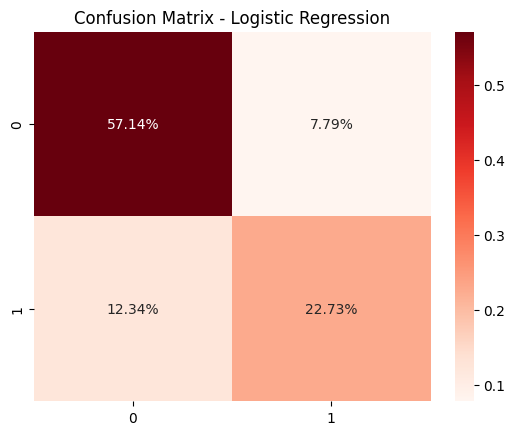

In [5]:
y_pred = logreg.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc_score}")
print(f"Classification Report:\n {class_report}")
print(f"Confusion Matrix:\n {conf_matrix}")

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Reds')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig('../../outputs/charts/nb2_confusion_matrix_logreg.png', bbox_inches='tight')
plt.show()

Nhận xét:
- Mô hình có độ chính xác khá tốt (~80.5%), hiệu suất tổng thể ổn định.
- Hiệu suất giữa hai lớp không đồng đều, đặc biệt là với lớp 1.
    - Lớp 0 (không bị bệnh):
        - Precision: 82% -> Trường hợp dự đoán "không bị bệnh" đúng.
        - Recall: 89% -> Mô hình rất tốt trong việc dự đoán người không bị bệnh.
        - F1-score: 86% -> Cân bằng tốt giữa Precision và Recall.
        - Kết luận: Mô hình hoạt động tốt với lớp 0.
    - Lớp 1 (bị bệnh):
        - Precision: 76% -> Trường hợp dự đoán "bị bệnh" đúng.
        - Recall: 65% -> Mô hình bỏ sót khá nhiều người thực sự bị bệnh.
        - F1-score: 70% -> Cần phải cải thiện.
        - Kết luận : Mô hình có thiếu sót lớn trong việc tìm ra người bị bệnh.
- Tổng kết: Mô hình chưa đủ tốt trong việc nhận diện bệnh nhân bị bệnh.

### 2.2. KNeighbors Classifier <a id="kneighbors-classifier"></a>

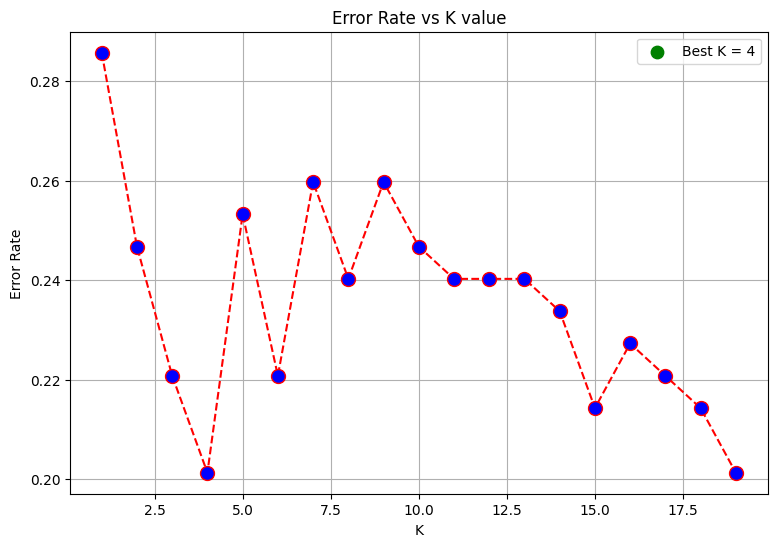

In [6]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(9,6))
plt.plot(range(1,20), error_rate, color = 'red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)

best_k = np.argmin(error_rate) + 1
plt.scatter(best_k, min(error_rate), color='green', s=80, label=f'Best K = {best_k}')
plt.legend()
plt.savefig('../../outputs/charts/nb2_error_rate_vs_k.png', bbox_inches='tight')
plt.show()

Accuracy = 0.7987, F1-score = 0.7717
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.74      0.65      0.69        54

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154

Confusion Matrix: 
[[88 12]
 [19 35]]


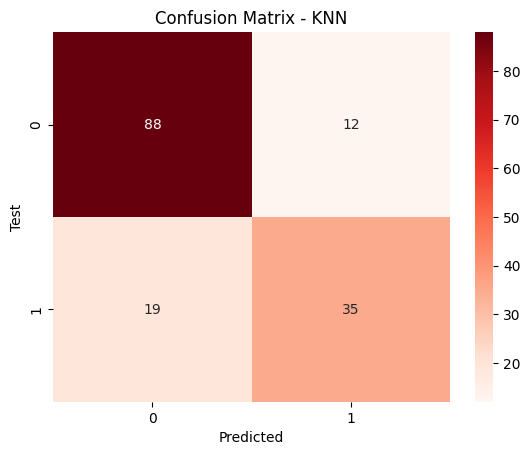

In [8]:
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n {class_report}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{cm}")
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Confusion Matrix - KNN')
plt.savefig('../../outputs/charts/nb2_confusion_matrix_knn.png', bbox_inches='tight')
plt.show()

Nhận xét:
- Mô hình có độ chính xác khá tốt (~81.2%), hiệu suất tổng thể ổn định.
- Hiệu suất giữa hai lớp không đồng đều, đặc biệt là với lớp 1.
    - Lớp 0 (không bị bệnh):
        - Precision: 81% → Dự đoán "không bị bệnh" đúng với độ chính xác cao.
        - Recall: 93% → Mô hình rất tốt trong việc phát hiện người không bị bệnh.
        - F1-score: 87% → Cân bằng rất tốt giữa độ chính xác và khả năng bao phủ.
        - Kết luận: Mô hình hoạt động rất tốt với lớp 0.
    -  Lớp 1 (bị bệnh):
        - Precision: 82% → Dự đoán "bị bệnh" đúng với độ chính xác khá cao.
        - Recall: 59% → Mô hình bỏ sót nhiều người thực sự bị bệnh.
        - F1-score: 69% → Hiệu suất chưa cao, cần cải thiện.
        - Kết luận: Mô hình còn thiếu sót lớn trong việc phát hiện người bị bệnh.
- Tổng kết: Mô hình vẫn chưa đủ mạnh để đảm bảo phát hiện đầy đủ bệnh nhân vì tỷ lệ bỏ sót bệnh (False Negative) còn cao.

### 2.3. Random Forest Classifier <a id="random-forest-classifier"></a>

In [10]:
# Create RF object
rfc = RandomForestClassifier(n_estimators=100, random_state=0, criterion='gini', max_depth=3)

In [11]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Accuracy: 0.7801302931596091
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       100
           1       0.81      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.80      0.73      0.75       154
weighted avg       0.79      0.79      0.78       154

Confusion Matrix: 
[[93  7]
 [25 29]]


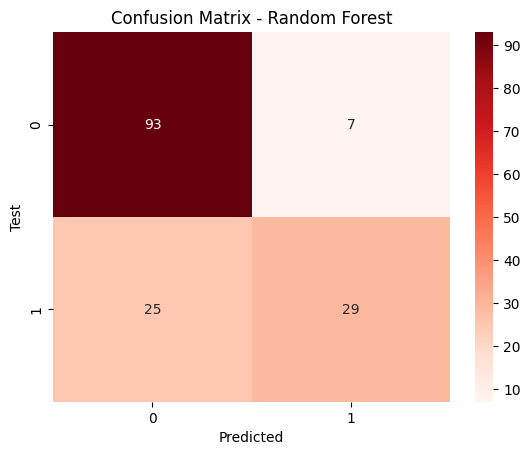

In [12]:
eval_model = rfc.score(X_train, y_train)
print(f"Accuracy: {eval_model}")
print(f"Classification_Report: \n {classification_report(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{cm}")

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Confusion Matrix - Random Forest')
plt.savefig('../../outputs/charts/nb2_confusion_matrix_rf.png', bbox_inches='tight')
plt.show()

Nhận xét:
- Mô hình có độ chính xác ở mức khá (~78.3%), tuy nhiên chưa thực sự cao để đảm bảo độ tin cậy trong các bài toán nhạy cảm như y tế.
- Hiệu suất giữa hai lớp không đồng đều, đặc biệt là với lớp 1.
    - Lớp 0 (không bị bệnh):
        - Precision: 81% → Dự đoán "không bị bệnh" đúng với độ chính xác cao.
        - Recall: 93% → Mô hình rất tốt trong việc phát hiện người không bị bệnh.
        - F1-score: 87% → Cân bằng tốt giữa độ chính xác và khả năng bao phủ.
        - Kết luận: Mô hình hoạt động hiệu quả với lớp 0.
    - Lớp 1 (bị bệnh):
        - Precision: 82% → Dự đoán "bị bệnh" đúng với độ chính xác khá cao.
        - Recall: 59% → Mô hình bỏ sót đáng kể người thực sự bị bệnh.
        - F1-score: 69% → Hiệu suất chưa cao, cần được cải thiện.
        - Kết luận: Mô hình còn thiếu sót lớn trong việc phát hiện người bị bệnh — đây là điểm yếu nghiêm trọng nếu ứng dụng trong y tế.
- Tổng kết: Dù precision cao cho cả hai lớp, nhưng recall của lớp 1 còn thấp → mô hình chưa phù hợp nếu mục tiêu là giảm thiểu rủi ro bỏ sót bệnh nhân. Cần cải thiện để tăng độ bao phủ với người thực sự bị bệnh.

### 2.4. Support Vector Machine <a id="support-vector-machine"></a>

In [13]:
SVM = SVC(kernel="linear")
SVM.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
SVM_pred = SVM.predict(X_test)
print(SVM_pred)

[1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 1 0 0]


Accuracy: 0.7922077922077922
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       100
           1       0.75      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix: 
[[89 11]
 [21 33]]


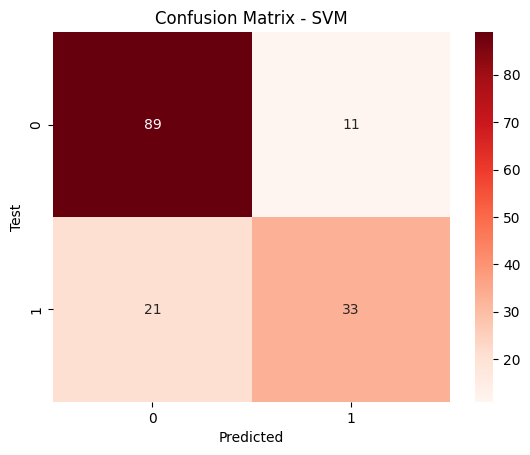

In [16]:
acc_score = accuracy_score(y_test, SVM_pred)
print(f"Accuracy: {acc_score}") 
cr = classification_report(y_test, SVM_pred)
print(f"Classification Report: \n{cr}")

# CMatrix
cm = confusion_matrix(y_test, SVM_pred)
print(f"Confusion Matrix: \n{cm}")
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Confusion Matrix - SVM')
plt.savefig('../../outputs/charts/nb2_confusion_matrix_svm.png', bbox_inches='tight')
plt.show()

Nhận xét:
- Mô hình có độ chính xác tương đối tốt (~79.2%), tuy nhiên vẫn còn hạn chế khi xét đến hiệu suất giữa hai lớp.
- Hiệu suất không đồng đều giữa hai lớp, đặc biệt là với lớp 1.
    - Lớp 0 (không bị bệnh):
        - Precision: 81% → Dự đoán "không bị bệnh" đúng với độ chính xác cao.
        - Recall: 89% → Mô hình khá tốt trong việc phát hiện người không bị bệnh.
        - F1-score: 85% → Hiệu suất cao, cân bằng giữa precision và recall.
        - Kết luận: Mô hình hoạt động tốt với lớp 0.
    - Lớp 1 (bị bệnh):
        - Precision: 75% → Dự đoán "bị bệnh" đúng với độ chính xác trung bình.
        - Recall: 61% → Mô hình bỏ sót một tỷ lệ lớn người thực sự bị bệnh.
        - F1-score: 67% → Hiệu suất chưa cao, cần được cải thiện.
        - Kết luận: Mô hình còn hạn chế trong việc phát hiện đúng các trường hợp bị bệnh – điều này đáng lo ngại nếu áp dụng vào các lĩnh vực nhạy cảm như y tế.
- Tổng kết: Mô hình có xu hướng thiên lệch về lớp 0, hoạt động chưa hiệu quả với lớp 1. Cần cải thiện khả năng nhận diện người bị bệnh để giảm rủi ro bỏ sót bệnh nhân.

## 3. Model Summary and Selection <a id="model-summary-and-selection"></a>

- Điểm chung của các mô hình (Logistic Regression, KNN, Random Forest, SVM):
    - Đều có Accuracy khá ổn (~78-81%).
    - Recall của lớp 1 (bị bệnh) thấp dẫn đến bỏ sót bệnh nhân bị bệnh.
- Chọn mô hình tốt nhất:
    - KNN là mô hình cho ra chỉ số đánh giá (accuracy, precision, recall, f1-score) trên tập test tốt hơn với những mô hình khác.
    - Recall lớp 1 còn thấp, nhưng KNN cho ra kết quả  giữa hai lớp cân bằng hơn so với các mô hình còn lại.
    - K-Neareast Neighbors là mô hình tốt nhất để sử dụng cho các bước tiếp theo.



## 4. Save Best Model <a id="save-best-model"></a>

In [42]:
joblib.dump(knn_model, '../../models/best_model.pkl')
print('Save the best model in models/best_model.pkl')


Save the best model in models/best_model.pkl
